# Useful Links

https://selectfrom.dev/10-sql-queriesyou-should-know-as-a-data-scientist-8bf616204765

# GroupBy

https://learnsql.com/blog/group-by-sql-interview-questions/

select e2.manager_id, count(e1.employee_id) as "No of Reportees"  from employees e1 join employees e2 
on e1.employee_id=e2.manager_id group by e2.manager_id order by e2.manager_id;


select *  from employees e1 join employees e2 
on e1.employee_id=e2.manager_id order by e2.manager_id;

select avg(e.salary), sum(e.salary), d.department_name, count(e.employee_id) from employees e join departments d ON e.department_id=d.department_id
group by d.department_name order by avg(e.salary) desc;

# Count

https://learnsql.com/blog/difference-between-count-distinct/

|Scenario|Description|
|-|-|
|count(*) |counts the total rows in the table, including the NULL values|
|COUNT(-13) or COUNT(1)|counts the total rows in the table, including the NULL values|
|count(column_name)|count all the rows in the specified column while **excluding NULL values**, will include duplicate values when counting|
|COUNT (DISTINCT column_name)| count only distinct (unique) rows in the defined column.|
|COUNT(CASE WHEN order_price > 1000 THEN 1 END)|1. Find all the values in the column order_price above 1 000.<br/>2. Assign the value 1 (you can assign any value you want) to these values.<br/> 3. Assign NULL to rows with prices below 1 000.<br/> 4. Count the number of assigned 1s.<br/> 5. Show the result in the column significant_orders.|

**Query**
|Query|Output|
|-|-|
|select * from employees where manager_id is NULL;|count:1|
|select count(*) from employees;|count:40|
|select count(manager_id) from employees;|count:39(Since we have 1 missing manager_id)|

# Date
```
select date_part('year', hire_date) as year, date_part('month', hire_date) as month, date_part('day',hire_date) as day,
date_part('dow',hire_date) as dayofweek,
to_char(hire_date, 'Dy') as day_name,
to_char(hire_date,'Month') as month_name from employees;
```

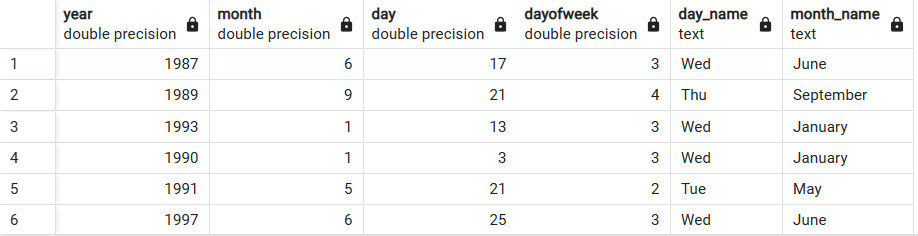

select To_Char("Date", 'DAY'), * from "MyTable"; -- TUESDAY<br/>
select To_Char("Date", 'Day'), * from "MyTable"; -- Tuesday<br/>
select To_Char("Date", 'day'), * from "MyTable"; -- tuesday<br/>
select To_Char("Date", 'dy'), * from "MyTable";  -- tue<br/>
select To_Char("Date", 'Dy'), * from "MyTable";  -- Tue<br/>
select To_Char("Date", 'DY'), * from "MyTable";  -- TUE<br/>

# CASE WHEN

```
select employee_id, first_name, salary, (select round(avg(salary)) from employees) as average_salary,
(CASE WHEN salary > (select avg(salary) from employees) THEN 'higher_than_average' ELSE 'lower_than_average' END) as salary_case
from employees;
```

**Multiple Condition**

```
SELECT employee_id,
CASE 
WHEN salary=min_salary THEN 'LOW_SALARY'
WHEN salary=max_salary THEN 'MAX_SALARY'
WHEN salary<avg_salary THEN 'LESS_THEN_AVG_SALARY'
WHEN salary>avg_salary THEN 'GREATER_THAN_AVG_SALARY'
END as salary_status from employees
```

# Correlated Subqueries

A correlated subquery is one way of reading every row in a table and comparing values in each row against related data. It is used whenever a subquery must return a different result or set of results for each candidate row considered by the main query.

Example: Write a query that finds the first name, salary, department, and average salary by department.

``select employee_id, first_name, salary, d.department_id, d.department_name,
(select round(avg(salary)) from employees e2 where e1.department_id= e2.department_id) as department_average from employees e1 
join departments d on e1.department_id=d.department_id 
where salary < (select round(avg(salary)) from employees e2 where e1.department_id= e2.department_id);``

# Window Functions
Window functions provide the ability to perform calculations across sets of rows that are related to the current query row. Window functions apply **aggregate and ranking functions over a particular window (set of rows). OVER clause is used with window functions to define that window. OVER clause does two things:**

- Partitions rows to form set of rows (PARTITION BY clause is used).
- Orders rows within those partitions into a particular order (ORDER BY clause is used).

Various aggregate functions such as SUM(), COUNT(), AVERAGE(), MAX(), and MIN() applied over a particular window (set of rows) are called aggregate window functions.

|Name|Description|
|---|---|
|CUME_DIST|Return the relative rank of the current row.|
|DENSE_RANK|Rank the current row within its partition without gaps.|
|FIRST_VALUE|Return a value evaluated against the first row within its partition.|
|LAG|Return a value evaluated at the row that is at a specified physical offset row before the current row within the partition.|
|LAST_VALUE|Return a value evaluated against the last row within its partition.|
|LEAD|Return a value evaluated at the row that is offset rows after the current row within the partition.|
|NTILE|Divide rows in a partition as equally as possible and assign each row an integer starting from 1 to the argument value.|
|NTH_VALUE|Return a value evaluated against the nth row in an ordered partition.|
|PERCENT_RANK|Return the relative rank of the current row (rank-1) / (total rows – 1)|
|RANK|Rank the current row within its partition with gaps.|
|ROW_NUMBER|Number the current row within its partition starting from 1.|

**Aggregate functions (e.g., SUM, COUNT, AVG, etc.) can be used as window functions as well**

|Function|Argument Type(s)|Return Type|Description|
|--|--|--|--|
|array_agg(expression)|any|array of the argument type|input values, including nulls, concatenated into an array|
|avg(expression)|smallint, int, bigint, real, double precision, numeric, or interval|numeric for any integer-type argument, double precision for a floating-point argument, otherwise the same as the argument data type|the average (arithmetic mean) of all input values|
|bit_and(expression)|smallint, int, bigint, or bit|same as argument data type|the bitwise AND of all non-null input values, or null if none|
|bit_or(expression)|smallint, int, bigint, or bit|same as argument data type|the bitwise OR of all non-null input values, or null if none|
|bool_and(expression)|bool|bool|true if all input values are true, otherwise false|
|bool_or(expression)|bool|bool|true if at least one input value is true, otherwise false|
|count(*)| |bigint|number of input rows|
|count(expression)|any|bigint|number of input rows for which the value of expression is not null|
|every(expression)|bool|bool|equivalent to bool_and|
|json_agg(expression)|any|json|aggregates values as a JSON array|
|max(expression)|any array, numeric, string, or date/time type|same as argument type|maximum value of expression across all input values|
|min(expression)|any array, numeric, string, or date/time type|same as argument type|minimum value of expression across all input values|
|string_agg(expression, delimiter)|(text, text) or (bytea, bytea)|same as argument types|input values concatenated into a string, separated by delimiter|
|sum(expression)|smallint, int, bigint, real, double precision, numeric, interval, or money|bigint for smallint or int arguments, numeric for bigint arguments, otherwise the same as the argument data type|sum of expression across all input values|
|xmlagg(expression)|xml|xml|concatenation of XML values (see also Section 9.14.1.7)

## Aggregation by Partitions

The following query will give you the average salary for each department.

``select first_name, salary, ROUND(AVG(salary) OVER(PARTITION BY e1.department_id)) as avg_salary_by_dept,
e1.department_id, d.department_name, ROW_NUMBER() OVER(PARTITION BY d.department_id ORDER BY salary DESC) AS "Row Number"
FROM employees e1 join departments d on e1.department_id=d.department_id  
order by salary DESC;``

## Ranking the Values

The Rank() function is a window function that assigns a rank to each row within a partition of a result set.

The following example orders the table by the salary (descending). A rank value of 1 is the highest salary value.

**select first_name, salary, RANK() OVER (ORDER BY salary desc) FROM employees;**

**select first_name, salary, RANK() OVER (ORDER BY salary desc), DENSE_RANK() OVER (ORDER BY salary desc) FROM employees;**


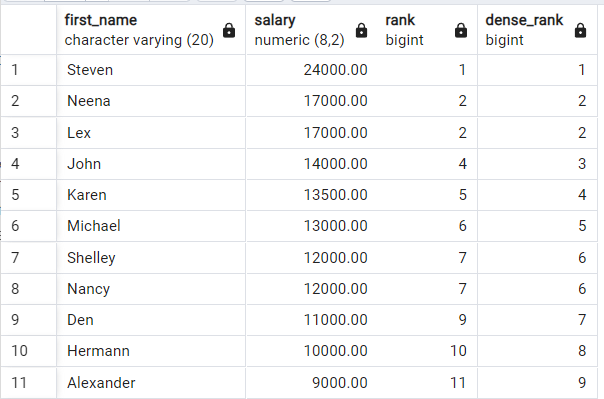

## Lag

The PostgreSQL lag() function returns the value from the specified row before the current row in the partition where the current row is located.

**LAG (column, offset, default) OVER (ORDER BY column)**

**offset**
The number of rows back from the current row from which to access data. The offset must be a non-negative integer. It defaults to one if skipped.

**default_value**
If the preceding row is not specified, default_value is returned. For example, when the offset is 2, the return value from the first row is default_value. If default_value is not given and no preceding row found, NULL is returned by default.


```
CREATE TABLE basic_pays (
	employee_id int,
	fiscal_year INT,
	salary DECIMAL(10 , 2 ),
	PRIMARY KEY (employee_id, fiscal_year)
);
```

DDL & DML - https://www.sqltutorial.org/sql-window-functions/sql-lag/

SELECT employee_id, fiscal_year, salary,
LAG(salary) OVER (PARTITION BY employee_id order by employee_id,fiscal_year)
from basic_pays;

**Value is set as '0' for empty value**

SELECT employee_id, fiscal_year, salary,
LAG(salary,2,0) OVER (PARTITION BY employee_id order by employee_id,fiscal_year) as previous_year
from basic_pays;

![image.png](attachment:image.png)

### Calculate percentage hike

SELECT prev_year.*, 
CASE WHEN previous_year IS NOT NULL THEN CONCAT((ROUND((prev_year.salary-prev_year.previous_year)/100)),'%') END as percentage from
(
SELECT employee_id, fiscal_year, salary,
LAG(salary,1) OVER (PARTITION BY employee_id order by employee_id,fiscal_year) as previous_year
from basic_pays) as prev_year;

![image.png](attachment:image-2.png)

# Group vs Windows Function

- When comparing window functions and GROUP BY, it’s essential to remember that **GROUP BY collapses the individual records into groups; after using GROUP BY, you cannot refer to any individual field because it is collapsed**.

- So, if you want to create a **report with an employee name, salary, and the top salary of the employee’s department, you can’t do it with GROUP BY. The individual records of each employee are collapsed by the GROUP BY department clause**. For this kind of report, you need to use window functions

- Window functions are a powerful feature of SQL. They allow us to **apply functions like AVG, COUNT, MAX, and MIN on a group of records while still leaving the individual records accessible**. Since the individual records are **not collapsed**, we can create queries showing data from the individual record together with the result of the window function. This is what makes window functions so powerful.


|Group By|SQL PARTITION BY|
|-|-|
|We get a limited number of records using the Group By clause|We get all records in a table using the PARTITION BY clause.|
|It gives one row per group in result set. For example, we get a result for each group of CustomerCity in the GROUP BY clause.|It gives aggregated columns with each record in the specified table.<br/><br/>We have 15 records in the Orders table. In the query output of SQL PARTITION BY, we also get 15 rows along with Min, Max and average values.|


# Date

select hire_date, age(CURRENT_DATE, hire_date),
   date_part('year',age(CURRENT_DATE, hire_date)),
   date_part('month',age(CURRENT_DATE, hire_date)),
   date_part('day',age(CURRENT_DATE, hire_date))
   from employees;

## Date Between

select * from employees where hire_date BETWEEN '01-01-1970' AND '01-01-1992';

# Sample Queries

select e2.manager_id, count(e1.employee_id) as "No of Reportees"  from employees e1 join employees e2 
on e1.employee_id=e2.manager_id group by e2.manager_id order by e2.manager_id;


select *  from employees e1 join employees e2 
on e1.employee_id=e2.manager_id order by e2.manager_id;

select round(avg(e.salary)), sum(e.salary), d.department_name, count(e.employee_id) from employees e join departments d ON e.department_id=d.department_id
group by d.department_name order by avg(e.salary) desc;

select count(*) from employees;

select count(manager_id) from employees;

select max(e.salary), e.employee_id, e.first_name from employees e group by e.employee_id order by e.salary desc LIMIT 1;

select employee_id, first_name, salary from employees
where salary IN(select max(salary) from employees e  group by e.employee_id order by e.salary);

select first_name, CASE WHEN salary > 4500 THEN 'HIGH SALARY' ELSE NULL END as high_salary from employees;

select date_part('year', hire_date) as year, date_part('month', hire_date) as month, date_part('day',hire_date) as day,
date_part('dow',hire_date) as dayofweek,
to_char(hire_date, 'Dy') as day_name,
to_char(hire_date,'Month') as month_name from employees;

select employee_id, first_name, salary, (select round(avg(salary)) from employees) as average_salary,
(CASE WHEN salary > (select avg(salary) from employees) THEN 'higher_than_average' ELSE 'lower_than_average' END) as salary_case
from employees;


select employee_id, first_name, salary, d.department_id, d.department_name,
(select round(avg(salary)) from employees e2 where e1.department_id= e2.department_id) as department_average from employees e1 
join departments d on e1.department_id=d.department_id 
where salary < (select round(avg(salary)) from employees e2 where e1.department_id= e2.department_id);

select first_name, salary, ROUND(AVG(salary) OVER(PARTITION BY e1.department_id)) as avg_salary_by_dept,
e1.department_id, d.department_name, ROW_NUMBER() OVER(PARTITION BY d.department_id ORDER BY salary DESC) AS "Row Number",
DATEDIFF(year, e1.hire_date, GETDATE()) AS "Experience"
FROM employees e1 join departments d on e1.department_id=d.department_id  
order by salary DESC;

select first_name, salary, RANK() OVER (ORDER BY salary desc) FROM employees;


select hire_date, age(CURRENT_DATE, hire_date),
   date_part('year',age(CURRENT_DATE, hire_date)),
   date_part('month',age(CURRENT_DATE, hire_date)),
   date_part('day',age(CURRENT_DATE, hire_date))
   from employees;


select emp.first_name, manager.manager_id, manager."No of Reportees" from employees emp,
(select e2.manager_id, count(e1.employee_id) as "No of Reportees"  from employees e1 join employees e2 
on e1.employee_id=e2.manager_id group by e2.manager_id order by e2.manager_id) as manager
-- on emp.employee_id=manager.manager_id;
where emp.employee_id=manager.manager_id;

select * from employees where manager_id=100;


select e2.manager_id,e1.first_name
, count(CASE WHEN e1.employee_id < 102 THEN 1 END) as "No of Reportees"  
from employees e1 join employees e2 
on e1.employee_id=e2.manager_id group by e2.manager_id,e1.first_name order by e2.manager_id;

select * from employees where manager_id is NULL;

select * from departments;

select * from jobs;

select count(100) from employees;

select hire_date, date_part('year', hire_date), date_part('month', hire_date)
, date_part('day', hire_date), date_part('dow',hire_date) as dayofweek,
to_char(hire_date, 'Dy') as day_name,
to_char(hire_date,'Month') as month_name
from employees;

select employee_id, first_name, salary, (select d.department_id, round(avg(salary)) from departments d, employees e2 
										 where d.department_id = e2.department_id group by d.department_id ) as department_avg_salary
-- , (CASE WHEN salary > department_avg_salary THEN 'HIGHER_THAN_AVG' ELSE 'LOWER_THAN_AVG' END) as "Salary Range"
from employees;

with dept as (select d.department_id,round(avg(e.salary)) as "avg_salary" from departments d, employees e
			  where d.department_id=e.department_id group by d.department_id),
emp as (select e.employee_id,e.first_name,e.salary from employees e where e.department_id=dept.department_id)
select * from emp;


select e.employee_id,e.first_name,e.salary, dept.department_id,dept.avg_salary, 
(CASE WHEN e.salary > dept.avg_salary THEN 'HIGHER' ELSE 'LOWER' END) as "Salary vs Median"
from (select d.department_id,round(avg(e1.salary)) as "avg_salary" from departments d, employees e1
where d.department_id=e1.department_id group by d.department_id) dept, employees e 
where dept.department_id=e.department_id;

select employee_id, salary, department_id,
ROUND(AVG(salary) OVER (PARTITION BY department_id)) as "AVG_SALARY",
SUM(salary) OVER (PARTITION BY department_id) as "SUM_SALARY",
ROW_NUMBER() OVER (PARTITION BY employee_id) as "ROW_NUM"
from employees;

select first_name, salary, RANK() OVER (ORDER BY salary desc), DENSE_RANK() OVER (ORDER BY salary desc) FROM employees;

select * from countries;

with emp_sal_avg AS
(SELECT round(AVG(salary)) as avg_salary from employees),
emp_avg_dept AS
(SELECT  round(AVG(salary)) as avg_dept_salary, department_id from employees e group by e.department_id)
SELECT employee_id, salary,emp_sal_avg.avg_salary, e.department_id, emp_avg_dept.avg_dept_salary
from employees e, emp_sal_avg, emp_avg_dept 
where e.department_id=emp_avg_dept.department_id 
AND e.salary > emp_sal_avg.avg_salary
AND e.salary > emp_avg_dept.avg_dept_salary;

SELECT employee_id, salary, (SELECT ROUND(AVG(salary)) from employees) as AVG_SAL --, AVG(salary) OVER(PARTITION by department_id) as "AVG_SALARY"
from employees emp 
group by emp.employee_id
HAVING emp.salary > (SELECT AVG(salary) from employees)

select e2.employee_id, e2.first_name, det.sum_salary, det.SAL_RANK
FROM (SELECT e1.employee_id, e1.first_name, 
	  SUM(salary) as sum_salary,
	  RANK() OVER (ORDER BY sum(e1.salary) desc) as SAL_RANK
	  from employees e1 group by e1.employee_id)as det,
	  employees e2 where det.employee_id = e2.employee_id AND det.SAL_RANK <= 10;



with emp_sal_avg(avg_salary) AS
(SELECT round(AVG(salary)) from employees),
emp_avg_dept(avg_dept_salary) AS
(SELECT  round(AVG(salary)), department_id from employees e group by e.department_id)
SELECT employee_id, salary,emp_sal_avg.avg_salary, e.department_id, emp_avg_dept.avg_dept_salary
from employees e, emp_sal_avg, emp_avg_dept 
where e.department_id=emp_avg_dept.department_id 
AND e.salary > emp_sal_avg.avg_salary
AND e.salary > emp_avg_dept.avg_dept_salary;

SELECT count(DISTINCT employee_id), avg(salary) from employees;

SELECT count(employee_id), avg(salary) from employees;

SELECT * FROM DEPARTMENTS;

select count(1) FILTER (group by department_id IN (9,6)) as count
from employees;

select d1.department_name, dept.* FROM
(select department_id, COUNT(employee_id) as emp_count, ROUND(AVG(salary)) as AVG_SALARY
, MIN(salary) as MIN_SALARY, MAX(salary) as MAX_SALARY
from employees group by department_id ) as dept join
departments d1 on dept.department_id = d1.department_id order by dept.AVG_SALARY desc;

select sal_rank.* FROM
(select employee_id, salary, DENSE_RANK() OVER (ORDER BY salary desc) AS SAL_RANK from employees) as sal_rank
where sal_rank.SAL_RANK=3

SELECT dept_dup.*,d1.department_name  FROM
(select department_id, count(department_id) as cnt from employees group by department_id HAVING count(department_id) > 1) as dept_dup
JOIN departments d1 ON d1.department_id=dept_dup.department_id order by dept_dup.cnt desc

SELECT MAX(salary) OVER (PARTITION BY department_id order by salary desc) from employees;

SELECT dept_dup.*,d1.department_name  FROM
(SELECT department_id, MAX(salary) as max_sal from employees group by department_id) as dept_dup
JOIN departments d1 ON d1.department_id=dept_dup.department_id ORDER BY dept_dup.max_sal desc;

SELECT DATE_PART('year',hire_date) as year, TO_CHAR(hire_date, 'MONTH') as month, count(employee_id) from employees
group by DATE_PART('year',hire_date),TO_CHAR(hire_date, 'MONTH');

SELECT DATE_PART('year',hire_date) as year, count(employee_id) from employees
group by DATE_PART('year',hire_date) order by count(employee_id) desc;


SELECT SUBSTRING(last_name, 1, 4), last_name from employees


# Like

select * from employees where first_name like '%h';

# Queries

find duplicate rows in a database? and then write SQL query to delete them?


# Subquery using **With**

https://www.geeksforgeeks.org/sql-with-clause/

```
WITH temporaryTable (averageValue) as
    (SELECT avg(Attr1)
    FROM Table)
    SELECT Attr1
    FROM Table, temporaryTable
    WHERE Table.Attr1 > temporaryTable.averageValue;
```

 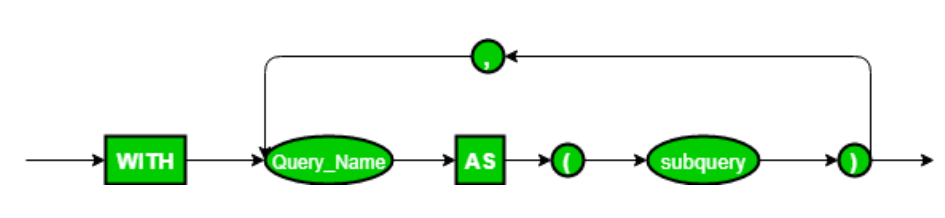

```
with emp_sal_avg AS
    (SELECT round(AVG(salary)) as avg_salary from employees),
emp_avg_dept AS
    (SELECT  round(AVG(salary)) as avg_dept_salary, 
    department_id 
    from employees e group by e.department_id)
SELECT employee_id, salary,emp_sal_avg.avg_salary, e.department_id, emp_avg_dept.avg_dept_salary
from employees e, emp_sal_avg, emp_avg_dept 
where e.department_id=emp_avg_dept.department_id 
AND e.salary > emp_sal_avg.avg_salary
AND e.salary > emp_avg_dept.avg_dept_salary;
```

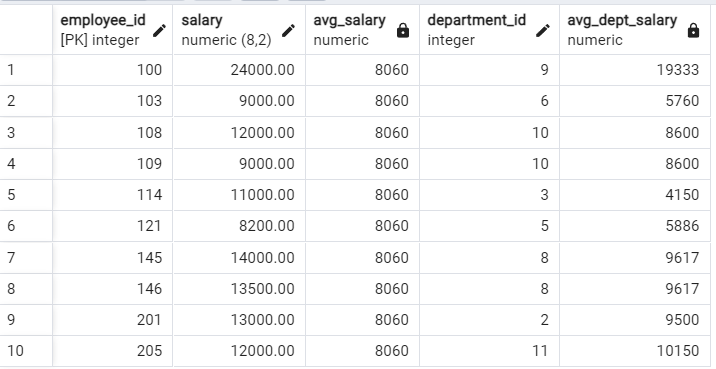

```
with emp_sal_avg(avg_salary) AS
    (SELECT round(AVG(salary)) from employees),
emp_avg_dept(avg_dept_salary) AS
    (SELECT  round(AVG(salary)), 
    department_id 
    from employees e group by e.department_id)
SELECT employee_id, salary,emp_sal_avg.avg_salary, e.department_id, emp_avg_dept.avg_dept_salary
from employees e, emp_sal_avg, emp_avg_dept 
where e.department_id=emp_avg_dept.department_id 
AND e.salary > emp_sal_avg.avg_salary
AND e.salary > emp_avg_dept.avg_dept_salary;
```

# FILTER

https://medium.com/little-programming-joys/the-filter-clause-in-postgres-9-4-3dd327d3c852

 FILTER clause is needed to aggregate functions and this clause is quite useful when you want to count or sum specific records when executing group by.

 The FILTER clause provides a better way to deal with scoped aggregate functions and it’s a beautiful way to replace the CASE WHEN statements for these cases.

**Without Filter**
 ```
SELECT purchases.seller_id,
  SUM(CASE WHEN state IN ('authorized', 'reversed') THEN 1 ELSE 0 END) AS sales_count,
  SUM(CASE WHEN state = 'authorized' THEN 1 ELSE 0 END) AS successful_sales_count
FROM purchases
GROUP BY purchases.seller_id
```

**Using Filter**
```
SELECT purchases.seller_id,
  COUNT(1) FILTER (WHERE state IN ('authorized', 'reversed')) AS sales_count,
  COUNT(1) FILTER (WHERE state = 'authorized') AS successful_sales_count
FROM purchases
GROUP BY purchases.seller_id
```

# Union & Union ALL

UNION first performs a **sorting operation and eliminates the records that are duplicated across all columns before finally returning the combined data set**. You can see that we use columns of the same data type and SELECT the **same number of columns** in each query. This follows the rules of using UNION and should execute without an error.

Same number of columns should be selected but it allows to fix different columns

```
SELECT employee_id, first_name,employee_id from employees where salary>16000
UNION
SELECT employee_id, first_name, salary from employees where salary>17000
```

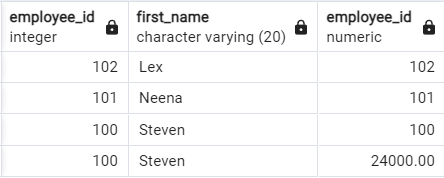

```
SELECT employee_id, first_name,salary from employees where salary>16000
UNION
SELECT employee_id, first_name, salary from employees where salary>17000
```
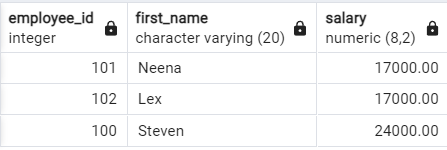

```
SELECT employee_id, first_name,salary from employees where salary>16000
UNION ALL
SELECT employee_id, first_name, salary from employees where salary>17000
```

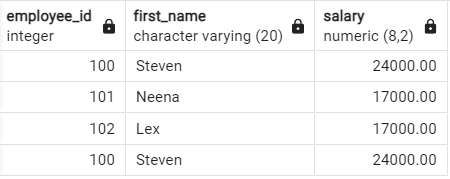

# MOD

Print Odd & even row:

```
SELECT * FROM
(SELECT *,ROW_NUMBER() OVER() as row_num from employees) as emp_num
where MOD(emp_num.row_num, 2)!=0
```

# Questions

SQL query to create a new table with data and structure copied from another table.
```
CREATE TABLE employee_bkup AS SELECT * FROM employees;
```
create an empty table with the same structure as some other table.
```
CREATE TABLE employee_bkup AS SELECT * FROM employees WHERE 1=2;
```

SQL query to fetch only even rows from the table.
```
SELECT * FROM
(SELECT *,ROW_NUMBER() OVER() as row_num from employees) as emp_num
where MOD(emp_num.row_num, 2)!=0
```
Top Nth Salary
```
With top_sal as (SELECT DISTINCT(salary) from employees order by salary desc)
SELECT * from top_sal LIMIT 10
```

3rd highest salary
```
select salary from
(SELECT salary,DENSE_RANK() OVER (ORDER BY salary desc) as sal_rank from employees) as emp
where emp.sal_rank=3 LIMIT 1
```
